# ------------------------------

# Proyecto 2

#### Parte A

Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

Detección y eliminación de Outliers

Encoding

Imputación de valores faltantes

Escalado de datos

Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado . Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#Vamos a eliminar las instancias con valores faltantes, y tambien realizar una mascara donde la superficie total sea mayor o igual que la superficie cubierta.

properatif1 = pd.read_csv('/content/drive/MyDrive/Curso Data Science/Proyectos/2/DS_Proyecto_01_Datos_Properati.csv')
properatif2a =  properatif1[(properatif1.surface_total>=properatif1.surface_covered)]
properatif2 = properatif2a.dropna()

properati2 = properatif2[(properatif2.property_type=="Departamento") | (properatif2.property_type=="PH") | (properatif2.property_type=="Casa") ]


In [3]:
# from google.colab import drive
# drive.mount('/content/drive') 

Comenzaremos con la deteccion y eliminacion de outliers. Los campos que pueden tener outliers que nos perjudiquen posteriormente en el entrenamiento de los modelos son el precio, la superficie cubierta y la superficie total. Comenzaremos con esta ultima. Para detectar los outliers, realizaremos la regla de los rangos interquartilicos para cada tipo de propiedad.


Text(0, 0.5, 'm2')

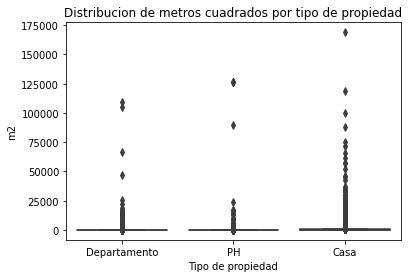

In [4]:
#Este grafico nos muestra la cantidad de outliers que posee el dataset antes de comenzar el pre-procesamiento de datos
sns.boxplot(data = properati2, x = 'property_type', y = "surface_total")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')


plt.xlabel('Tipo de propiedad')
plt.ylabel('m2')


In [5]:
depa =  properati2[(properati2.property_type=="Departamento")]
casa = properati2[(properati2.property_type=="Casa")]
ph =  properati2[(properati2.property_type=="PH")]

In [6]:
#Comenzamos con los departamenos

q25depst,q75depst = np.percentile(depa.surface_total.values, [25,75])
iqrdepst = q75depst - q25depst
minimodepst = q25depst - 1.5*iqrdepst
maximodepst = q75depst + 1.5*iqrdepst
properati_depa_st = depa[(depa.surface_total > minimodepst) & (depa.surface_total < maximodepst)]

q25depp,q75depp = np.percentile(properati_depa_st.price.values, [25,75])
iqrdepp = q75depp - q25depp
minimodepp = q25depp - 1.5*iqrdepp
maximodepp = q75depp + 1.5*iqrdepp
properati_depa_pr = properati_depa_st[(properati_depa_st.price > minimodepp) & (properati_depa_st.price < maximodepp)]

q25depsc,q75depsc = np.percentile(properati_depa_pr.surface_covered.values, [25,75])
iqrdepsc = q75depsc - q25depsc
minimodepsc = q25depsc - 1.5*iqrdepsc
maximodepsc = q75depsc + 1.5*iqrdepsc
properati_depa_sc = properati_depa_pr[(properati_depa_pr.surface_covered > minimodepsc) & (properati_depa_pr.surface_covered < maximodepsc)]



In [7]:
#seguimos por las casas

q25casast,q75casast = np.percentile(casa.surface_total.values, [25,75])
iqrcasast = q75casast - q25casast
minimocasast = q25casast - 1.5*iqrcasast
maximocasast = q75casast + 1.5*iqrcasast
properati_casa_st = casa[(casa.surface_total > minimocasast) & (casa.surface_total < maximocasast)]

q25casap,q75casap = np.percentile(properati_casa_st.price.values, [25,75])
iqrcasap = q75casap - q25casap
minimocasap = q25casap - 1.5*iqrcasap
maximocasap = q75casap + 1.5*iqrcasap
properati_casa_pr = properati_casa_st[(properati_casa_st.price > minimocasap) & (properati_casa_st.price < maximocasap)]

q25casasc,q75casasc = np.percentile(properati_casa_pr.surface_covered.values, [25,75])
iqrcasasc = q75casasc - q25casasc
minimocasasc = q25casasc - 1.5*iqrcasasc
maximocasasc = q75casasc + 1.5*iqrcasasc
properati_casa_sc = properati_casa_pr[(properati_casa_pr.surface_covered > minimocasasc) & (properati_casa_pr.surface_covered < maximocasasc)]



In [8]:
#Y finalmente terminamos con los PH

q25phst,q75phst = np.percentile(ph.surface_total.values, [25,75])
iqrphst = q75phst - q25phst
minimophst = q25phst - 1.5*iqrphst
maximophst = q75phst + 1.5*iqrphst
properati_ph_st = ph[(ph.surface_total > minimophst) & (ph.surface_total < maximophst)]

q25php,q75php = np.percentile(properati_ph_st.price.values, [25,75])
iqrphp = q75php - q25php
minimophp = q25php - 1.5*iqrphp
maximophp = q75php + 1.5*iqrphp
properati_ph_pr = properati_ph_st[(properati_ph_st.price > minimophp) & (properati_ph_st.price < maximophp)]

q25phsc,q75phsc = np.percentile(properati_ph_pr.surface_covered.values, [25,75])
iqrphsc = q75phsc - q25phsc
minimophsc = q25phsc - 1.5*iqrphsc
maximophsc = q75phsc + 1.5*iqrphsc
properati_ph_sc = properati_ph_pr[(properati_ph_pr.surface_covered > minimophsc) & (properati_ph_pr.surface_covered < maximophsc)]



Ahora, anexamos los distintos datasets ya pre-procesados para visualizar los resultados

In [9]:
properati_anexado = pd.concat([properati_ph_sc ,properati_casa_sc , properati_depa_sc])

Text(0, 0.5, 'm2 totales')

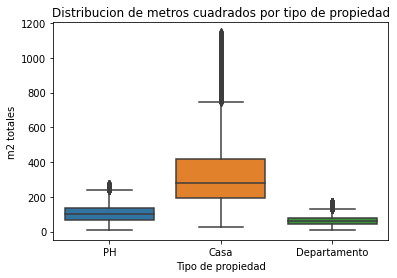

In [10]:
sns.boxplot(data = properati_anexado, x = 'property_type', y = "surface_total")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('m2 totales')


Text(0, 0.5, 'm2 cubiertos')

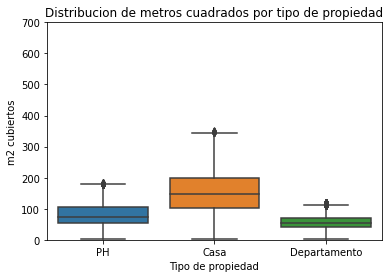

In [11]:
sns.boxplot(data = properati_anexado, x = 'property_type', y = "surface_covered")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.ylim(0,700)
plt.xlabel('Tipo de propiedad')
plt.ylabel('m2 cubiertos')

Text(0, 0.5, 'Precio')

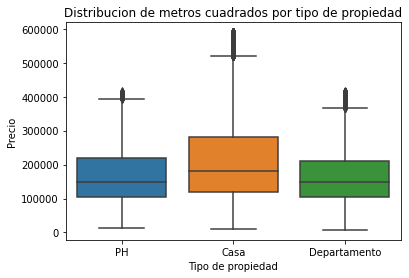

In [12]:
sns.boxplot(data = properati_anexado, x = 'property_type', y = "price")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')

Debido a que seguimos viendo algunos outliers, vamos a proceder por eliminar este restante aplicandole un filtro sobre un valor fijo, y luego visualizaremos nuevamente los graficos

In [13]:
properati_anexado1 = properati_anexado[(properati_anexado.surface_covered < 300)]
properati_anexado2 = properati_anexado1[(properati_anexado1.price < 400000)]

properati_anexado_f = properati_anexado2[(properati_anexado2.surface_total < 600)]


Text(0, 0.5, 'm2 totales')

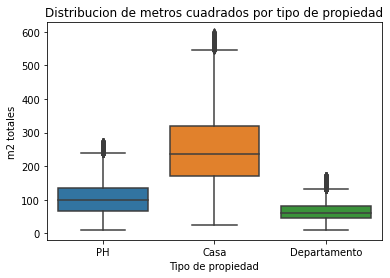

In [14]:
sns.boxplot(data = properati_anexado_f, x = 'property_type', y = "surface_total")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('m2 totales')


Text(0, 0.5, 'm2 cubiertas')

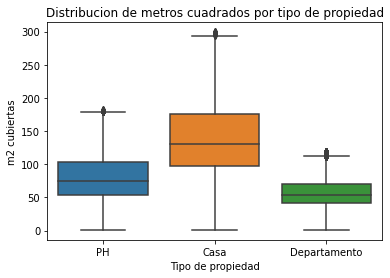

In [15]:
sns.boxplot(data = properati_anexado_f, x = 'property_type', y = "surface_covered")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('m2 cubiertas')


Text(0, 0.5, 'm2 cubiertas')

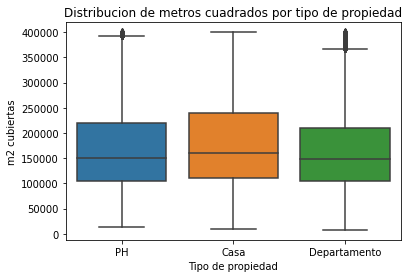

In [16]:
sns.boxplot(data = properati_anexado_f, x = 'property_type', y = "price")

plt.title('Distribucion de metros cuadrados por tipo de propiedad')

plt.xlabel('Tipo de propiedad')
plt.ylabel('m2 cubiertas')


Ya tenemos nuestro dataset sin outliers, por lo tanto ya podemos empezar a entrenar nuestros modelos con mejores datos.

Ahora realizaremos un encoding a los tipos de propiedades, para tenerlas como variables numericas. Vamos a realizar un encoding llamada "dummy encoding". Luego, anexamos el resultado y lo agregamos a nuestro dataset.

In [17]:
properati_dummys = pd.get_dummies(properati_anexado_f.property_type)

properati_anexado = pd.concat([properati_anexado_f,properati_dummys], axis=1)


Por ultimo, vamos a realizar un escalado de datos.

In [18]:
from sklearn.preprocessing import StandardScaler



X2 = properati_anexado[['bathrooms','surface_covered','surface_total']]
y = properati_anexado.price

columnas = ['bathrooms','surface_covered','surface_total']

for col in columnas:
    scl = StandardScaler()
    X2 = scl.fit_transform(X2)

Ya podemos hacer un train/test split, y evaluar nuestro dataset para poder compararlo con los resultados de nuestro modelo anterior.

In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.30, random_state=42)



In [20]:
lista_r2_train_tree = []
lista_r2_test_tree = []

m_depth = [1,2,3,4,5,6,7,8,9,10,12,13]

# Generamos un loop sobre los distintos valores de m
for m in m_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de max_depth deseado
    prop_tree = DecisionTreeRegressor(max_depth=m, random_state = 42)
    
    
    # Entrenar el modelo
    prop_tree.fit(X_train, y_train)
    
    # Predecimos el set de entrenamiento y de testeo
    y_train_pred_tree = prop_tree.predict(X_train)
    y_test_pred_tree = prop_tree.predict(X_test)
    
    # Evaluamos el set de entrenamiento y de testeo
    r2_train_tree = r2_score(y_train, y_train_pred_tree)
    r2_test_tree = r2_score(y_test, y_test_pred_tree)
    
    # Agregar la información a las listas
    lista_r2_train_tree.append(r2_train_tree)
    lista_r2_test_tree.append(r2_test_tree)



Text(0, 0.5, 'R2')

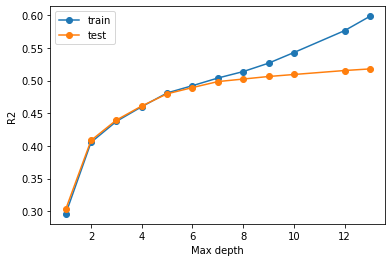

In [21]:
plt.plot(m_depth, lista_r2_train_tree,'o-',label='train')
plt.plot(m_depth, lista_r2_test_tree,'o-',label='test')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')

En nuestro anterior modelo de arbol de decision, el mejor R2 se obtenia cuando la profundidad del arbol era igual a 12, con un R2 de 0.76. Aqui nuestro R2 mas alto es de 0.51 con la misma profundidad, por lo tanto nuestro modelo anterior sigue siendo mejor. Esto es debido a que


#### PARTE B - Modelos Avanzados

1.Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

2.Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

3.Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

#### Vamos a comenzar con un modelo de Regresion polinomica, al cual le haremos una regularizacion.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(7, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)


    # Evaluamos el set de entrenamiento y de testeo
r2_train_lr = r2_score(y_train, y_train_pred_2)
r2_test_lr = r2_score(y_test, y_test_pred_2)
    
print(r2_train_lr)
print(r2_test_lr)

(64974, 119) (27846, 119)
0.4906999882199976
-1.6508559610599955


#####Nota para el corrector: El R2 cuadrado de testeo, me da un numero que no tiene sentido. Tambien noto que los R2 resultantes de mi nuevo dataset, son muy bajos comparados con el del proyecto 1. ¿Hay algo que estoy haciendo mal en el pre-procesamiento de datos?


#### El segundo modelo elegido sera un random forest

In [29]:
%%time
from sklearn.ensemble import RandomForestRegressor
import scipy as sp
from sklearn.model_selection import GridSearchCV


param_random_tree = {'max_depth':np.arange(1, 4),
              'criterion': ['mse'], 
              'min_samples_split':np.arange(2,5),
              'min_samples_leaf':np.arange(1,4)}

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)


forest_grid = GridSearchCV(random_forest, param_grid=param_random_tree, cv=5, n_jobs=15, return_train_score=True )
forest_grid.fit(X_train, y_train)

CPU times: user 7.41 s, sys: 316 ms, total: 7.73 s
Wall time: 2min 15s


In [24]:
print("Mejores parametros: "+str(forest_grid.best_params_))
print("Mejor Score: "+str(forest_grid.best_score_)+'\n')

Mejores parametros: {'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Mejor Score: 0.4420916331976887



Los R2 de mis modelos avanzados son muy bajos, mientras que mi arbol de decision del punto A tiene un mayor R2. Por este punto que menciono, entiendo que mi mejor modelo sigue siendo el arbol de decision.

##PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?


¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

**Interpretación**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


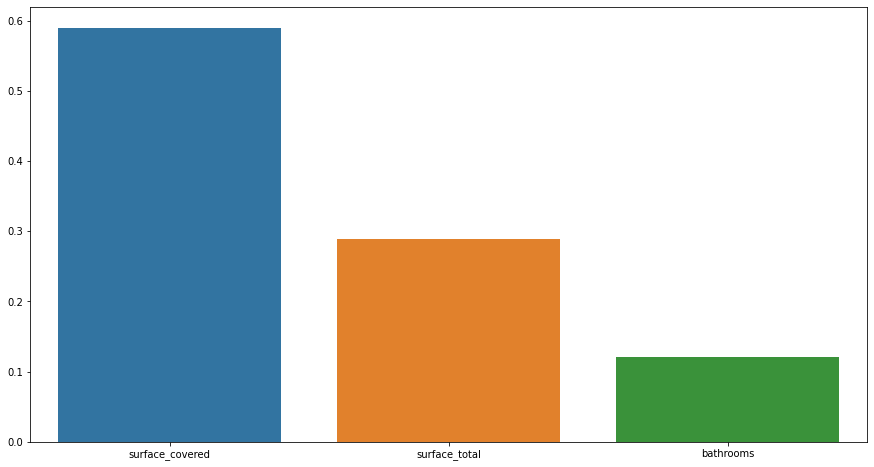

In [31]:
#Vamos a ver cual fue la variable mas importante
importances = random_forest.feature_importances_
columns = np.array(columnas)
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Vemos que la variable mas importante fue la superficie cubierta, mientras que la cantidad de baños fue la que menos peso tuvo a la hora de entrenar nuestros modelos.

**Errores**

Como pudimos observar en los modelos avanzados implementados. Tenemos un R2 de 0.49 en la regresion logistica, mientras que en el mejor arbol de nuestro random forest, el R2 es de 0.44. 
Nuestro mayor error entonces esta en el Random Forest, dado a que nuestro R2 es menor que en la regresion logistica. Esto se puede debe a la optimizacion de los hiperparametros que se aplico en el Random Forest.


**Metodología**

Los resultados de este segundo proyecto no superaron a los del primero. Aun haciendo un pre-procesamiento de datos, el R2 de todos mis nuevos modelos es inferior al mejor R2 del proyecto 1. Utilice la eliminacion de outliers, encoders y normalizacion de los datos, mientras que mi metrica para visualizar el error fue el R2. 

Mejoraria el rendimiento de mis modelos, ya que es bastante bajo. Creo que en el pre-procesamiento de datos, hay pasos en los cuales no estoy haciendo un correcto procedemiento y esto deriva en el rendimiento de mi modelo final.